# Glassdoor Salary Predictor

In [3]:
import pandas as pd
import numpy as np
import re
import datetime
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
import itertools
from sklearn.metrics import accuracy_score
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

import time
import csv
import sys

# !pip install wordcloud
# nltk.download('stopwords')

# Scraping from Glassdoor

In [255]:
driver = webdriver.Chrome(executable_path='./chromedriver.exe')
driver.set_window_size(1120, 1000)


def handle_popup():
    try:
        popup = driver.find_element("xpath","//*[@id='MainCol']/div[1]/ul/li[1]")
        if(popup):
            popup.click()
            time.sleep(2)
            driver.find_element("xpath",'//*[@id="JAModal"]/div/div[2]/span').click()  
            time.sleep(2)
    except:
        print("")
        
        
def get_jobs(country_code, country_name, job, num_of_jobs=1):
    search_text = f'{country_name}-${job}'
    start_pos = len(country_name) + 1
    end_pos = len(search_text)
    
    url = f'https://www.glassdoor.com/Job/{country_name}-{job}-jobs-SRCH_IL.0,2_I{country_code}_KO{start_pos},{end_pos}.htm?includeNoSalaryJobs=false'
    driver.get(url)

    time.sleep(10)
    jobs = []

    job = 1
    while job <= num_of_jobs :
        handle_popup()
             
        try:
            job_buttons = driver.find_elements(By.XPATH, '//*[@id="MainCol"]/div[1]/ul/li')
            
            try:
                job_buttons[0].click()
                time.sleep(5)
                handle_popup()
            except:
                print("first not found")
                
    
            for job_button in job_buttons:
                if(job >=num_of_jobs):
                    break
                job+=1
                
                try:        
                    job_button.click()
                    time.sleep(5)
                    print(f'Job Number: {job}')
                    
                except:
                    print("Failed to click on job button")
                    time.sleep(7)
                    continue
                    
                try:
                    job_title = driver.find_element(By.CSS_SELECTOR, 'div[data-test="jobTitle"]').text
                    print(f'Job title: {job_title}')
                except:
                    job_title = -1
                    print("Job title not found")
                    
                
                try:
                    employer_name = driver.find_element(By.CSS_SELECTOR, 'div[data-test="employerName"]').text
                except:
                    employer_name = -1
                    print("employer_name not found")
    
                try:
                    location = driver.find_element(By.CSS_SELECTOR, 'div[data-test="location"]').text
                except:
                    location = -1
                    print("location not found")
                                
    
                try:
                    Rating = driver.find_element(By.CSS_SELECTOR, 'span[data-test="detailRating"]').text
                except:
                    Rating = -1

                    ###Salary
                try:
                    salary = driver.find_element(By.CSS_SELECTOR, 'span[data-test="detailSalary"]').text
                    print(f'Salary: {salary}')
                except:
                    salary = -1
                    print("Salary not found")

                ###Company size
                try:
                    company_size = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[1]/span[2]').text
                    
                except:
                    company_size = -1

                ###founded year
                try:
                    founded_year = driver.find_element(By.XPATH,'//*[@id="EmpBasicInfo"]/div[1]/div/div[2]/span[2]').text
                except:
                        founded_year = -1


                    # Show more button
                try:
                    showmorebutton = driver.find_element(By.XPATH, '//*[@id="JobDescriptionContainer"]/div[2]')
                    showmorebutton.click()

                except:
                    showmorebutton = -1
                
                try: 
                    description = driver.find_element(By.XPATH, '//div[@class="jobDescriptionContent desc"]').text
                    # print(f'description : {description}')

                except:
                    description = -1
               
                ##Comapny Revenue
                try:
                        Company_Revenue = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[6]/span[2]').text
                        # print(f'Revenue : {Company_Revenue}')

                except:
                    Company_Revenue=-1

                ##industry
                try:
                        Industry = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[4]/span[2]').text
                        # print(f'Industry : {Industry}')

                except:
                    Industry=-1
                ##Company Type
                try:
                    Company_Type = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[3]/span[2]').text
                    # print(f'Company Type : {Company_Type}')

                except:
                    Company_Type=-1

                ## Company Sector
                try:
                    Company_Sector = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[5]/span[2]').text
                    # print(f'Company Sector : {Company_Sector}')

                except:
                    Company_Sector =-1
            
                try:
                    carrier_opportunities = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[2]/div[1]/div[4]/div/ul/span[3]').text
                except:
                    carrier_opportunities =-1
 
                try:
                    comp_and_benefits = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[2]/div[1]/div[4]/div/ul/span[6]').text
                except:
                    comp_and_benefits =-1
 
                try:
                    culuture_and_values = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[2]/div[1]/div[4]/div/ul/span[9]').text
                except:
                    culuture_and_values =-1

                try:
                    senior_management = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[2]/div[1]/div[4]/div/ul/span[12]').text
                except:
                    senior_management =-1
 

                try:
                    life_balance = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[2]/div[1]/div[4]/div/ul/span[15]').text
                except:
                    life_balance =-1
 
 
                try:
                    btn_1 = driver.find_element(By.XPATH, '//*[@id="JDCol"]//button[@type="button" and contains(text(), "Retry your search")]')

                    if btn_1:
                        btn_1.click()
                        time.sleep(10)
                except:
                    btn_1 = -1
 
                try:
                    btn_2 = driver.find_element(By.XPATH, "//div[@id='JDCol']//button[@type='button' and contains(text(), 'Retry your search')]")

                    if btn_2:
                        btn_2.click()
                        time.sleep(10)
                except:
                    btn_2 = -1
                try:
                    btn_3 = driver.find_element(By.XPATH, "//*[@type='button' and contains(text(), 'Retry your search')]")
                    if btn_3:
                        btn_3.click()
                        time.sleep(7)
                except:
                    btn_3 = -1   
                    
                jobs.append({
                    "Job Title": job_title,
                    "Glassdoor Location": country_name,
                    "Employer Name": employer_name,
                    "Location": location,
                    "Rating": Rating,
                    "Salary": salary,
                    "Carrier Opportunities": carrier_opportunities,
                    "Culure And Values": culuture_and_values,
                    "Senior Management": senior_management,
                    "Comp And Benefits": comp_and_benefits,
                    "Life Balance": life_balance,
                    "Company Size": company_size,
                    "Found year": founded_year,
                    "Description": description,
                    "Company Revenue": Company_Revenue,
                    "Industry": Industry,
                    "Company Type": Company_Type,
                    "Company Sector": Company_Sector
                })

            try:
                next_page_btn = driver.find_element(By.XPATH,'//*[@id="MainCol"]/div[2]/div/div[1]/button[7]')
                if next_page_btn.get_property('disabled') == True:
                    break
                next_page_btn.click()
                time.sleep(7)
            except e:
                print("Next button not found",e)
                break
                
        except Exception as e :
            print(e)
            print("Scraping terminated. Needed {}, got {}.".format(num_of_jobs, len(jobs)))
            break

    return jobs


def save_to_csv(csv_file_path,jobs):
    headers = list(jobs[0].keys())

    with open(csv_file_path, "w", newline="",encoding="utf-8") as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for item in jobs:
            writer.writerow(item)   

def get_data_science_jobs(country_code, num_of_jobs=10):
    jobs = []
    job_names = [
        'data analyst',
        'data scientist',
        'machine learning engineer',
        'data engineer'
    ]
    for country_name, code in country_code.items():
        for jon_name in job_names:
            country_jobs = get_jobs(country_code=code, country_name=country_name, job=jon_name, num_of_jobs=num_of_jobs)
            try:
                save_to_csv(f'{country_name}_data_engineer.csv',country_jobs)
            except Exception as e:
                print("failed to save country to csv",)
            jobs.extend(country_jobs)
    
    return jobs


/var/folders/f8/dt9j010d64q3wfxsqdxkngg80000gn/T/ipykernel_5429/1189008615.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver.exe')
Incompatible release of chromedriver (version 96.0.4664.45) detected in PATH: /usr/local/bin/chromedriver


### Call the scraper function

In [258]:
country_code = {
    "california": "S2280",
    "new-york": "C1132348",
    "san-jose": "C1147436",
    "los-angeles": "C1146821",
    "atlanta": "C1155583",
    "houston": "C1140171",
    "washington": "C1138213",
    "seattle": "C1150505",
}


# data_science_jobs = get_data_science_jobs(country_code=country_code, num_of_jobs=820)

# save_to_csv(csv_file_path="data.csv", jobs=data_science_jobs)

# Data exploration

#### Data is splitted into few CSV files, so initaliy we have to concat the files into a single Pandas dataframe

In [6]:
files = [
    "./data/atlanta.csv",
    "./data/california.csv",
    "./data/new-york.csv",
    "./data/houston.csv",
    "./data/seattle.csv",
    "./data/washington.csv",
    "./data/new-york_data_engineer.csv",
    "./data/san-jose_data_engineer.csv",
    "./data/los-angeles_data_engineer.csv",
    "./data/atlanta_data_engineer.csv",
    "./data/seattle_data_engineer.csv",
    "./data/washington_data_engineer.csv"
]

dfs = list(map(lambda file: pd.read_csv(file), files))
df = pd.concat(dfs, axis=0)

In [7]:
df

,Job Title,Glassdoor Location,Employer Name,Location,Rating,Salary,Carrier Opportunities,Culure And Values,Senior Management,Comp And Benefits,Life Balance,Company Size,Found year,Description,Company Revenue,Industry,Company Type,Company Sector
0,"Software Engineer, Machine Learning - Monetiza...",atlanta,Meta\n3.9,"Atlanta, GA",3.9,Employer Provided Salary:$140K - $204K,4.0,3.7,3.3,4.6,3.6,10000+ Employees,2004,From making valuable connections between peopl...,$10+ billion (USD),Internet & Web Services,Company - Public,Information Technology
1,Machine Learning Engineer,atlanta,Flock Safety\n4.2,"Atlanta, GA",4.2,$83K - $125K (Glassdoor est.),4.1,4.3,4.0,4.1,3.9,501 to 1000 Employees,2017,Company Overview\nFlock Safety provides the fi...,Unknown / Non-Applicable,Computer Hardware Development,Unknown,Information Technology
2,AI Software Engineer,atlanta,Delta\n4.3,"Atlanta, GA",4.3,$91K - $119K (Glassdoor est.),4.2,4.2,3.8,4.1,3.8,10000+ Employees,1928,"United States, Georgia, Atlanta\nInnovation & ...",$10+ billion (USD),"Airlines, Airports & Air Transportation",Company - Public,Transportation & Logistics
3,Senior Cloud Machine Learning Engineer,atlanta,The Coca-Cola Company\n4.1,"Atlanta, GA",4.1,$94K - $136K (Glassdoor est.),3.8,3.9,3.6,4.0,3.6,10000+ Employees,1886,"As an Azure ML Engineer, you will work with Da...",$10+ billion (USD),Food & Beverage Manufacturing,Company - Public,Manufacturing
4,Data Science Opportunities,atlanta,-1,"Atlanta, GA",-1.0,$70K - $113K (Glassdoor est.),4.4,4.6,4.3,4.5,4.5,10000+ Employees,1983,Overview\nIntuit is a global technology platfo...,$10+ billion (USD),Software Development,Company - Public,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Data Engineer,washington,Steampunk\n4.5,"McLean, VA",4.5,$97K - $136K (Glassdoor est.),4.5,4.5,4.3,4.2,4.4,201 to 500 Employees,2003,Overview:\nOverview\n\nIn today’s rapidly evol...,Unknown / Non-Applicable,Information Technology Support Services,Company - Private,Information Technology
357,TS/SCI Data Engineer,washington,Gridiron IT\n4.5,"Washington, DC",4.5,Employer Provided Salary:$65.00 - $73.00 Per Hour,4.5,4.4,4.3,4.3,4.7,51 to 200 Employees,2017,"Seeking a Data Engineer local to Washington, D...",Unknown / Non-Applicable,Information Technology Support Services,Company - Private,Information Technology
358,Senior Data Engineer,washington,"Akira Technologies, Inc\n3.9","Washington, DC",3.9,$101K - $143K (Glassdoor est.),3.9,3.9,3.9,3.9,3.9,51 to 200 Employees,2003,"Akira Technologies, Inc. is looking for a Seni...",Unknown / Non-Applicable,Information Technology Support Services,Company - Private,Information Technology
359,Data Engineer,washington,Syntelligent Analytic Solutions\n3.9,"Washington, DC",3.9,$82K - $123K (Glassdoor est.),3.8,4.0,3.5,3.7,4.0,1 to 50 Employees,Company - Public,"Syntelligent Analytic Solutions, LLC provides ...",-1,Telecommunications,"Cable, Internet & Telephone Providers",Unknown / Non-Applicable


## Data Cleaning

Firstly, remove duplicate rowsand duplicate job description

In [8]:

clean_df = df.copy()
clean_df = clean_df.drop_duplicates(inplace=False)
clean_df = clean_df.drop_duplicates(subset='Description',inplace=False)

Remove columns which does not contain the salary.

In [9]:
clean_df = clean_df[clean_df['Salary'] != '-1']

Fix Employer name, splitted by '\n'

In [10]:
clean_df['Employer Name'] = clean_df['Employer Name'].apply(lambda name: name.split('\n')[0])

Add 'city' and 'state' columns by Location and add dummies

In [11]:
clean_df['City'] = clean_df['Location'].apply(lambda x: x.split(',')[0] if ',' in x.lower() else x)
clean_df['State'] = clean_df['Location'].apply(lambda x: x.split(',')[1] if ',' in x.lower() else x) 

clean_df = pd.get_dummies(clean_df, columns=['State'], prefix=['State'])
clean_df = pd.get_dummies(clean_df, columns=['City'], prefix=['City'])

clean_df = clean_df.drop('Location', axis=1)
clean_df = clean_df.drop('Glassdoor Location', axis=1)

Replace missing numbers with the median

In [12]:
columns_median = ['Rating','Carrier Opportunities','Culure And Values','Senior Management','Comp And Benefits','Life Balance']

for column in columns_median:
    median = clean_df[column].median()
    clean_df.loc[clean_df[column] < 0, column] = median

Calculate company foundation year by 'Company Age'

In [13]:
current_year = datetime.datetime.now().year

invalid_values = ['Subsidiary or Business Segment', 'Government', 'Nonprofit Organization', '-1',
                  'Company - Private', 'Company - Public', 'Unknown','Contract','Self-employed']

clean_df['Found year'] = clean_df['Found year'].apply(lambda year: np.nan if year in invalid_values else year)
clean_df['Company Age'] = clean_df['Found year'].apply(lambda year: np.nan if pd.isnull(year) else current_year - int(year) if str(year).isdigit() else np.nan)
clean_df = clean_df.drop('Found year', axis=1)

median_company_age = clean_df['Company Age'].median()
clean_df['Company Age']  = clean_df['Company Age'].fillna(median_company_age)

Calculate comapny size by 'Comapny Size' column

In [14]:
def get_company_size(size_text):
    pattern = r'^(\d+) to (\d+) Employees$'
    match = re.match(pattern, size_text)
    
    if match:
        upper = int(match.group(2))
        return upper
    return 10000

clean_df['Company Size Upper'] = clean_df['Company Size'].apply(lambda size_text: np.nan if size_text in ['-1', 'Unknown'] else get_company_size(size_text))
median_value = clean_df['Company Size Upper'].median()
clean_df['Company Size Upper'] = clean_df['Company Size Upper'].fillna(median_value)

Set comany size using bins

In [15]:
bins = [0, 50, 200, 500, 1000, 5000, 10000, float('inf')]
clean_df['Company Size Level'] = pd.cut(clean_df['Company Size Upper'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7])
clean_df = clean_df.drop('Company Size Upper', axis=1)
clean_df = clean_df.drop('Company Size', axis=1)


Clean 'Salary' column

In [16]:
clean_df['Salary'] = clean_df['Salary'].str.replace(r'(Glassdoor est\.|Employer Provided Salary\:)\s*', '', regex=True)
clean_df['Salary'] = clean_df['Salary'].str.replace(r'\$|K|\(|\)|\s', '', regex=True)
clean_df = clean_df[clean_df["Salary"].str.contains("PerHour") == False]


Remove all hour based salaries from the datafram

In [17]:
clean_df = clean_df.drop(clean_df[clean_df['Salary'].str.contains('Per Hour')].index, inplace=False)

Calculate salary avg 

In [18]:
salary =  clean_df['Salary']
clean_df['min_salary'] = salary.apply(lambda x: int(x.split('-')[0]))
clean_df['max_salary'] = salary.apply(lambda x: int(x.split('-')[1]) if len(x.split('-')) > 1 else int(x.split('-')[0]))
clean_df['avg_salary'] = (clean_df.min_salary + clean_df.max_salary) / 2
clean_df = clean_df.drop(columns=['Salary', 'min_salary', 'max_salary'])

Remove outliers

In [19]:
Q1 = np.percentile(clean_df['avg_salary'], 20)
Q3 = np.percentile(clean_df['avg_salary'], 80)
IQR = Q3 - Q1

mask = (clean_df['avg_salary'] < Q1 - 1.5 * IQR) | (clean_df['avg_salary'] > Q3 + 1.5 * IQR)

clean_df.loc[(clean_df['avg_salary'] < Q1 - 1.5 * IQR) | (clean_df['avg_salary'] > Q3 + 1.5 * IQR), ['avg_salary']] = np.nan
clean_df = clean_df.dropna(subset=['avg_salary'])

Sanitize job title and description

In [20]:
stopWords = set(stopwords.words('english'))
remove_extra_whitespace = lambda x: ' '.join(x.split())
remove_stop_words = lambda x: ' '.join([word for word in x.split() if word not in stopWords])
remove_non_alpha = lambda x: re.sub(r'[^\w\s]',' ', x.lower())

clean_df['Job Title'] = clean_df['Job Title'].apply(remove_non_alpha)
clean_df['Job Title'] = clean_df['Job Title'].apply(remove_extra_whitespace)
clean_df['Job Title'] = clean_df['Job Title'].apply(remove_stop_words)


clean_df['Description'] = clean_df['Description'].apply(remove_non_alpha)
clean_df['Description'] = clean_df['Description'].apply(remove_extra_whitespace)
clean_df['Description'] = clean_df['Description'].apply(remove_stop_words)

Get job title

In [21]:
def job_title(title):
    if 'software engineer' in title.lower():
        return 'software engineer'
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research scientist' in title.lower():
        return 'research scientist'
    else:
        return 'data science jobs'
    
clean_df['Job'] = clean_df['Job Title'].apply(job_title)
clean_df = pd.get_dummies(clean_df, columns=['Job'], prefix=['Job'])

Get seniority by job title

In [22]:
def seniority(row):
    title = row['Job Title']
    description = ''
    senior_level = ['sr','senior','vp','lead','principal','experienced','iii','research','manager']
    mid_level = ['intermediate', 'staff', 'ii', 'mid-level','midlevel','mid level']
    junior_level = ['jr', 'junior', 'i', 'intern','student','Junior','associate','no experience']

    if any(keyword in title.lower() or keyword in description.lower() for keyword in senior_level):
        return 3
    
    elif any(keyword in title.lower() or keyword in description.lower() for keyword in mid_level):
        return 2
    elif any(keyword in title.lower() or keyword in description.lower() for keyword in junior_level):
        return 1
    else:
        return 0
clean_df['Seniority'] = clean_df.apply(seniority, axis=1)

Add tools as binary columns

In [23]:
tools = {
    'Python': 'python',
    'R': ['r studio', 'r-studio'],
    'SQL': 'sql',
    'AWS': 'aws',
    'Excel': 'excel',
    'GCP': ['google cloud', 'gcp'],
    'Azure': ['microsoft azure', 'azure'],
    'Spark': 'spark',
    'PyTorch': 'pytorch',
    'TensorFlow': ['tensorflow', 'tf'],
    'Tableau': 'tableau',
    'Keras': 'keras',
    'Scikit Learn': 'scikit learn',
    'Matlab': 'matlab',
    'SAS': 'sas'
}

for tool, keywords in tools.items():
    if isinstance(keywords, str):
        clean_df[tool] = clean_df['Description'].apply(lambda x: 1 if keywords in x.lower() else 0)
    elif isinstance(keywords, list):
        clean_df[tool] = clean_df['Description'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in keywords) else 0)

Degrees

In [24]:
clean_df['Master Degree'] = clean_df['Description'].apply(lambda x: 1 if 'master degree' in x.lower() else 0)
clean_df['Bachelors Degree'] = clean_df['Description'].apply(lambda x: 1 if 'bachelor degree' in x.lower() or 'computer science' in x.lower() else 0)

Get industry dummies

In [25]:
industry_keywords = {
    'enterprise': ['enterprise'],
    'health': ['hospital', 'health'],
    'financial': ['bank', 'financial'],
    'care': ['care'],
    'consulting': ['consulting'],
    'development': ['development'],
    'web': ['web services'],
    'internet': ['internet'],
    'hardware': ['hardware'],
    'information': ['information']
}

def industry_simplifier(title):
    for industry, keywords in industry_keywords.items():
        if any(keyword in title.lower() for keyword in keywords):
            return industry
    return 'general industry'

clean_df['Industry Type'] = clean_df['Industry'].apply(industry_simplifier)
clean_df = pd.get_dummies(clean_df, columns=['Industry Type'], prefix=['Industry Type'])

Add company type dummies

In [26]:
company_keywords = {
    'public': ['public'],
    'private': ['private'],
    'students': ['college', 'university'],
    'nonprofit': ['nonprofit'],
    'consulting': ['consulting'],
    'government': ['government'],
    'advertising': ['advertising'],
    'support': ['support'],
    'manufacturing': ['manufacturing']
}

def company_type(title):
    for company, keywords in company_keywords.items():
        if any(keyword in title.lower() for keyword in keywords):
            return company
    return 'global'

clean_df['Employer Type'] = clean_df['Company Type'].apply(company_type)
clean_df = pd.get_dummies(clean_df, columns=['Employer Type'], prefix=['Employer Type'])

# EDA

Text(0, 0.5, 'Frequency')

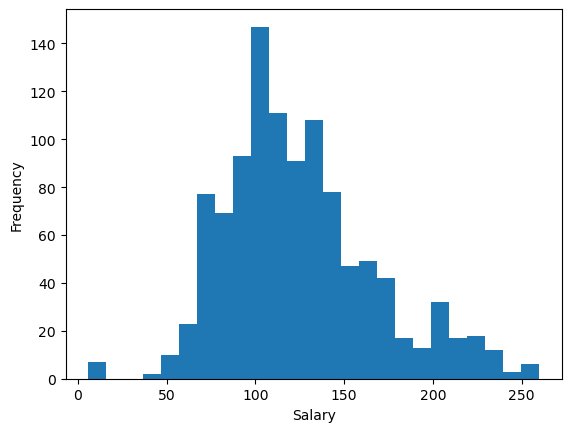

In [27]:
# Salary average plot
plt.hist(clean_df['avg_salary'], bins=25)
plt.xlabel("Salary")
plt.ylabel("Frequency")


/Users/ofeksinai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_salary'>

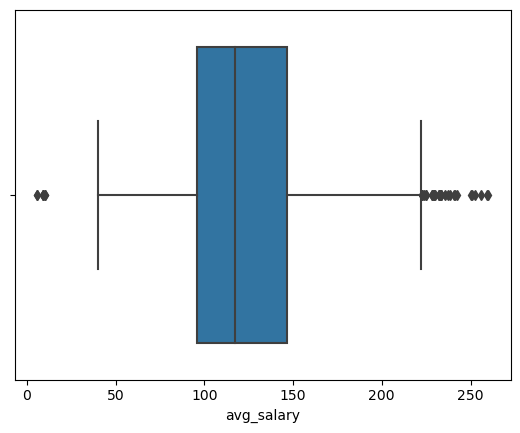

In [28]:
sns.boxplot(clean_df['avg_salary'])

Text(0, 0.5, 'Frequency')

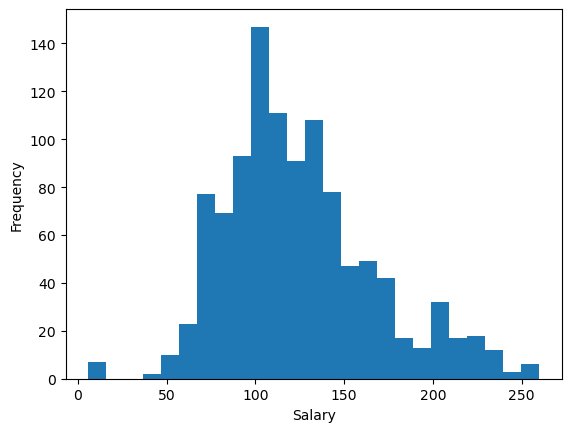

In [29]:
plt.hist(clean_df['avg_salary'], bins=25)
plt.xlabel("Salary")
plt.ylabel("Frequency")

In [30]:

def generate_word_cloud(series):
    # Concatenate all the elements in the series
    text = ' '.join(series)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Generate the word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis labels and ticks
    plt.show()

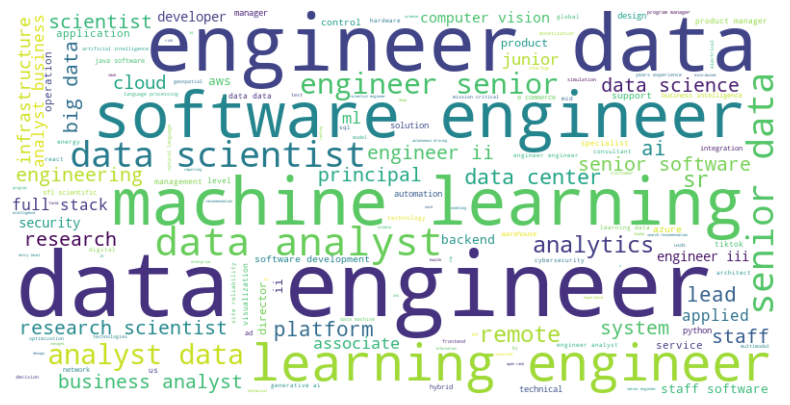

In [31]:
job_title = clean_df['Job Title']
generate_word_cloud(job_title)

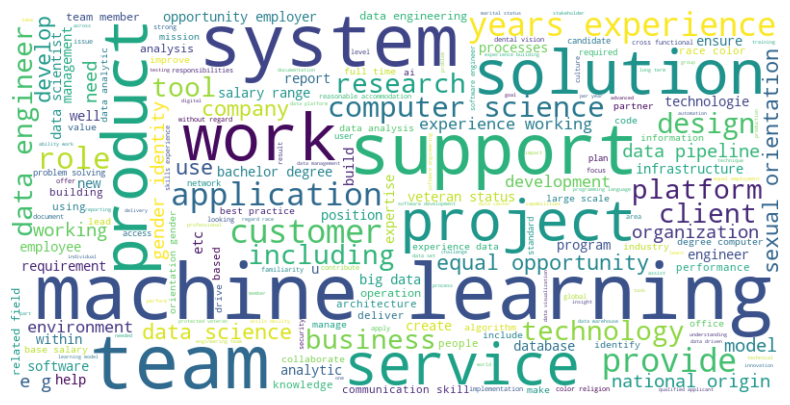

In [32]:
description = clean_df['Description']
generate_word_cloud(description)

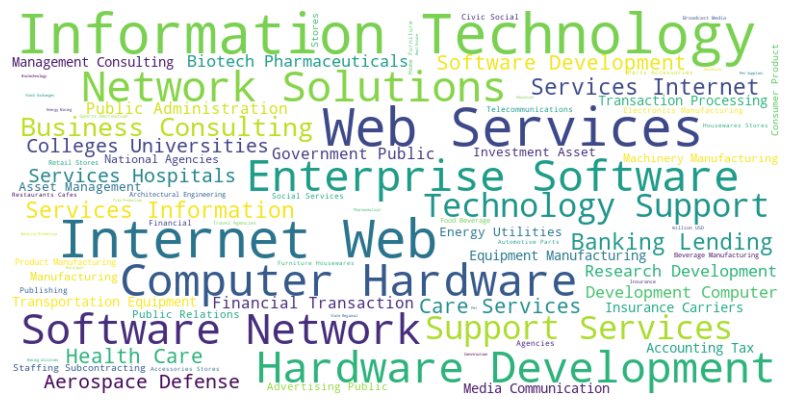

In [33]:
industry = clean_df['Industry']
generate_word_cloud(industry)


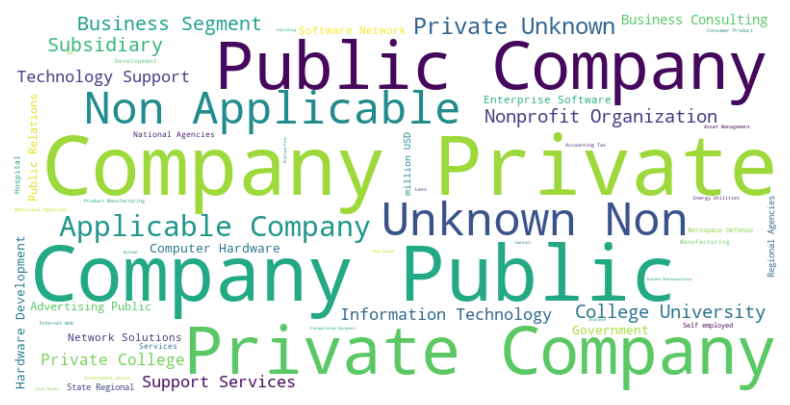

In [34]:
company_type = clean_df['Company Type']
generate_word_cloud(company_type)

In [35]:
# Splitting up salart into bins
salary_ranges = [0, 100, 185, 250, 350]
labels = [1, 2, 3, 4]
salary_level = pd.cut(clean_df['avg_salary'], bins=salary_ranges, labels=labels, right=False)
clean_df['Salary Level'] = salary_level

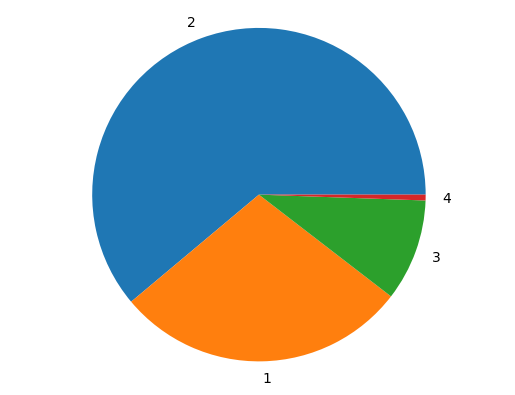

In [36]:
salary_levels = clean_df['Salary Level']

salary_counts = salary_levels.value_counts()

labels = salary_counts.index
sizes = salary_counts.values

plt.pie(sizes, labels=labels)
plt.axis('equal')

plt.show()

# Model 

Split the data

In [37]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    TRAINING_FEATURES = [col for col in dataset.columns if col not in ['Company Size','Rating','Seniority','Company Size Upper','Job', 'Job Title', 'Company Type', 'Industry', 'Employer Name', 'Company Sector', 'Description', 'Company Revenue','avg_salary','Salary Level']]
    
    TARGET_FEATURE = label_column
    
    X = dataset[TRAINING_FEATURES]
    y = dataset[TARGET_FEATURE]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    
    return X_train, X_test, y_train, y_test

test_ratio, rand_state = 0.2, 42
X_train, X_test, y_train, y_test = split_to_train_and_test(clean_df, 'Salary Level',test_ratio, rand_state) 


In [38]:
X_train

,Carrier Opportunities,Culure And Values,Senior Management,Comp And Benefits,Life Balance,State_ CA,State_ DC,State_ GA,State_ MD,State_ NJ,...,Industry Type_web,Employer Type_consulting,Employer Type_global,Employer Type_government,Employer Type_manufacturing,Employer Type_nonprofit,Employer Type_private,Employer Type_public,Employer Type_students,Employer Type_support
134,3.8,3.8,3.5,3.7,3.8,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
138,3.9,3.9,3.4,3.7,3.7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4.1,4.6,4.3,4.3,4.6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
127,3.5,3.7,3.4,3.2,3.8,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37,3.2,3.4,3.1,3.2,3.2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,3.4,3.1,2.9,3.7,3.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
110,3.8,3.7,3.4,3.9,3.3,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4.0,3.7,3.3,4.6,3.6,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
140,3.5,3.8,3.3,3.8,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Running the model

In [39]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42, max_depth=10),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42, max_depth=10),
    'KNeighborsClassifier': KNeighborsClassifier(10),
}


for name, clf in models.items():
    
    pipeline = Pipeline([
        ('classifier', clf),
    ])
    
    pipeline.fit(X_train, y_train)
    
    print(f'-'*30, '\n')
    print(name)
    
    test_predictions = pipeline.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))


print(f'-'*30)


------------------------------ 

LogisticRegression
Accuracy: 72.55814%
------------------------------ 

RandomForestClassifier
Accuracy: 72.55814%
------------------------------ 

DecisionTreeClassifier
Accuracy: 66.97674%
------------------------------ 

KNeighborsClassifier
Accuracy: 61.39535%
------------------------------
